In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
data = pd.read_csv(os.path.join('outputs', 'base_covid_tratada.csv'), encoding='ISO-8859-1', sep=';', header=0)

In [4]:
data.head()

,_idade,_faixa etária,_sexo,_bairro,_classificacao,_conclusao,_dt_notificacao,_tipo_teste,_distrito,_bairro_mapa
0,25.0,20a - 29a,F,ADRIANOPOLIS,Confirmado,Recuperado,20/03/2020,RT-PCR,SUL,ADRIANÓPOLIS
1,41.0,40a - 49a,F,BETANIA,Confirmado,Recuperado,27/03/2020,RT-PCR,SUL,BETÂNIA
2,40.0,40a - 49a,F,DOM PEDRO,Confirmado,Recuperado,20/04/2020,TESTE RÁPIDO - ANTICORPO,OESTE,DOM PEDRO
3,50.0,50a - 59a,M,FLORES,Confirmado,Recuperado,24/04/2020,RT-PCR,SUL,FLORES
4,30.0,30a - 39a,M,PRESIDENTE VARGAS,Confirmado,Recuperado,23/04/2020,TESTE RÁPIDO - ANTÍGENO,SUL,PRESIDENTE VARGAS


## 2.2 Visualização de Dados

### 1. Construa um histograma denotando a quantidade de casos nos 10 bairros em que houve mais casos registrados. Inclua todos os bairros remanescentes em uma categoria denominada “Outros.” Denote as informações de maneira percentual.

In [5]:
bairros_lista = data.groupby('_bairro_mapa')['_bairro_mapa'].describe().reset_index().sort_values(by='count', ascending=False).head(10)['_bairro_mapa'].to_list()
casos = data.copy(deep=True)

In [6]:
casos.loc[~casos['_bairro_mapa'].isin(bairros_lista), '_bairro_mapa'] = 'OUTROS'
bairros = casos.groupby('_bairro_mapa')['_bairro_mapa'].describe().reset_index().sort_values(by='count', ascending=True)

In [7]:
bairros['_porcentagem'] = (bairros['count'] / data.shape[0]) * 100

In [8]:
bairros

,_bairro_mapa,count,unique,top,freq,_porcentagem
4,JAPIIM,184,1,JAPIIM,184,2.96106
8,PETRÓPOLIS,199,1,PETRÓPOLIS,199,3.20245
5,NOVO ALEIXO,214,1,NOVO ALEIXO,214,3.44384
2,COMPENSA,234,1,COMPENSA,234,3.76569
10,TARUMÃ,235,1,TARUMÃ,235,3.78178
7,PARQUE 10 DE NOVEMBRO,246,1,PARQUE 10 DE NOVEMBRO,246,3.9588
0,ALVORADA,253,1,ALVORADA,253,4.07145
9,SÃO JOSÉ OPERÁRIO,259,1,SÃO JOSÉ OPERÁRIO,259,4.16801
3,FLORES,295,1,FLORES,295,4.74734
1,CIDADE NOVA,446,1,CIDADE NOVA,446,7.17734


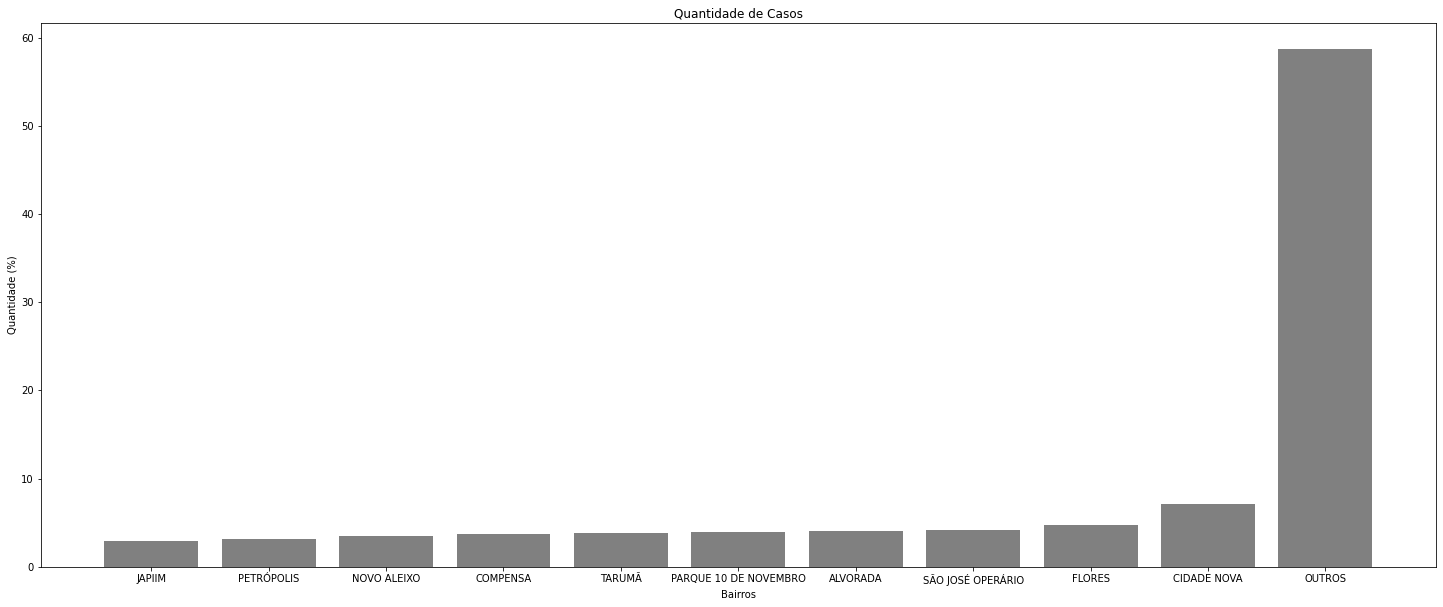

In [9]:
plt.figure(figsize=(25,10))
plt.bar(bairros['_bairro_mapa'], bairros['_porcentagem'], color='gray')
plt.title('Quantidade de Casos')
plt.xlabel('Bairros')
plt.ylabel('Quantidade (%)')
plt.savefig('questao1.jpg')

### 2. Denote, por sexo, o boxplot da idade dos casos confirmados. Há outliers?

In [10]:
mas = data[data['_sexo'] == 'M']
fem = data[data['_sexo'] == 'F']

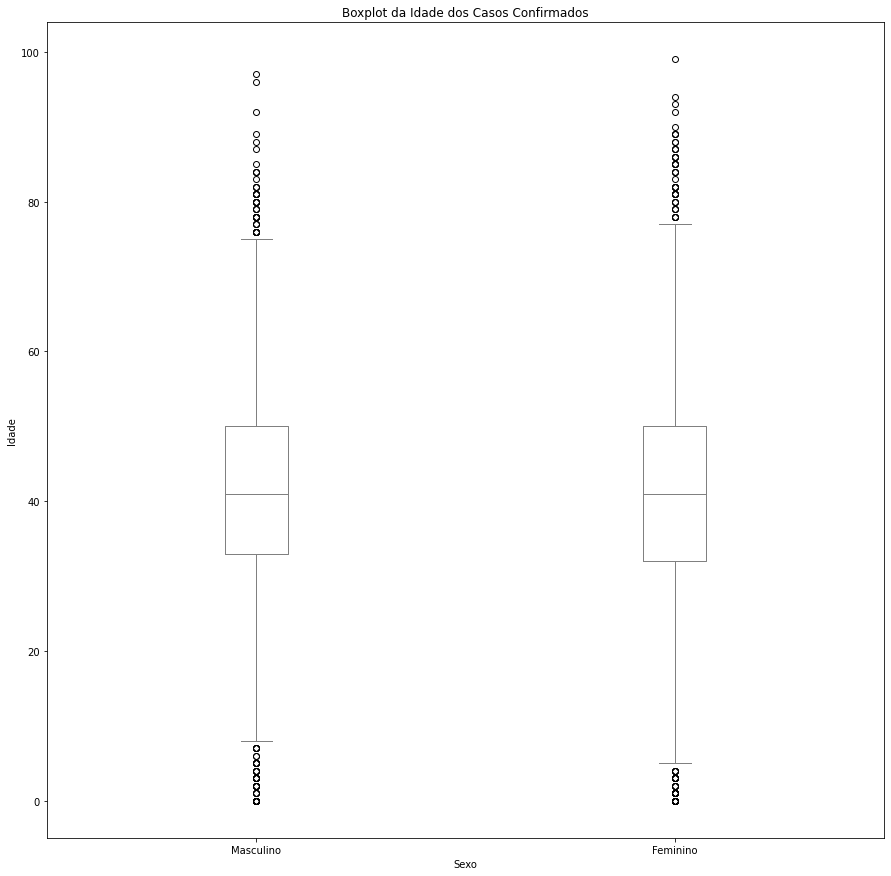

In [12]:
plt.figure(figsize=(15,15))
bx = plt.boxplot([mas['_idade'], fem['_idade']], labels=['Masculino', 'Feminino'])
for element in ['boxes', 'whiskers','fliers','means','medians', 'caps']:
    plt.setp(bx[element], color='gray')
plt.title('Boxplot da Idade dos Casos Confirmados')
plt.xlabel('Sexo')
plt.ylabel('Idade')
plt.savefig('questao2.jpg')

### Sim, existem elementos que estão fora dos limites do diagrama.

### 7. Faça um gráfico do tipo scatterplot que denote a idade versus o número total de casos registrado para aquela idade. Aproveite o processamento efetuado para o cálculo da correlação. É possível observar alguma tendência?

In [14]:
corr = data.groupby('_idade')['_idade'].describe().reset_index()
corr[['_idade', 'count']].corr()

,_idade,count
_idade,1.00000,-0.22462
count,-0.22462,1.00000
